## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar

## Importing dataset

In [2]:
df = pd.read_csv('Uber_Rides.csv')
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


## Understanding our data

In [3]:
print(df.shape)
df.info()

(1156, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


## Checking for missing values

In [4]:
df.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

Data like **End_Date**, **Start** should be present for every ride. This means there can be error in rows where this data is missing.
We will check which row have missing **End_Date**.

In [5]:
df[df['END_DATE*'].isnull()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


WE can see this row has **NULL** as the value for most of the data. So we will delete this row.

In [6]:
df.drop(df[df['END_DATE*'].isnull()].index, inplace = True)
df.isnull().sum()

START_DATE*      0
END_DATE*        0
CATEGORY*        0
START*           0
STOP*            0
MILES*           0
PURPOSE*       502
dtype: int64

## Removing the duplicate rows


In [7]:
df.drop(df[df.duplicated()].index, inplace = True)

Converting **Start_date** and **End_date** columns onto datetime

In [8]:
df['START_DATE*'] = pd.to_datetime(df['START_DATE*'], format = '%m/%d/%Y %H:%M')
df['END_DATE*'] = pd.to_datetime(df['END_DATE*'], format = '%m/%d/%Y %H:%M')
df.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
dtype: object

## EDA
**UNIVARIATE**

#### 1. CATEGORY

In [9]:
df['CATEGORY*'].unique()

array(['Business', 'Personal'], dtype=object)

Now we know that our data is divided into 2 categories: **Business** and **personal**.
Now we will find total miles travelled for each category.

In [10]:
df[['CATEGORY*', 'MILES*']].groupby(['CATEGORY*']).agg(tot_miles = ('MILES*', 'sum'))

,tot_miles
CATEGORY*,
Business,11477.1
Personal,717.7


Text(0.5, 1.0, 'Total Miles per Category')

<Figure size 640x480 with 0 Axes>

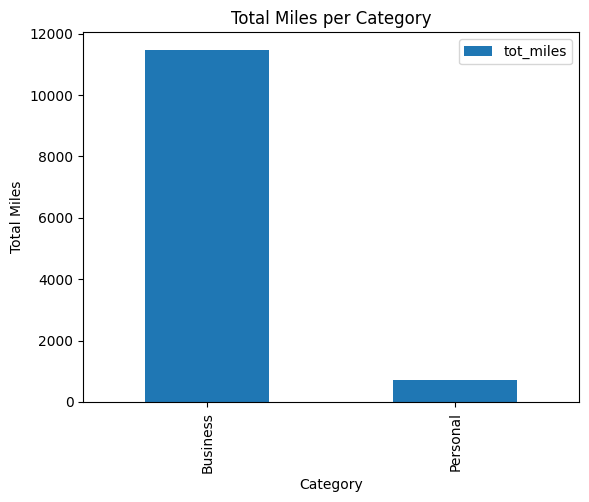

In [11]:
plt.figure()
df[['CATEGORY*', 'MILES*']].groupby(['CATEGORY*']).agg(tot_miles = ('MILES*', 'sum')).plot(kind = 'bar')
plt.xlabel('Category')
plt.ylabel('Total Miles')
plt.title('Total Miles per Category')

**INSIGHT : Users mainly use uber cabs for business purposes**

#### 2. START

In [12]:
len(df['START*'].unique())

177

In [13]:
df['START*'].value_counts(ascending = False)[0:10]

START*
Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Lahore               36
Durham               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Name: count, dtype: int64

<Axes: title={'center': 'Top 10 pickup locations'}, xlabel='Pickup Count', ylabel='Places'>

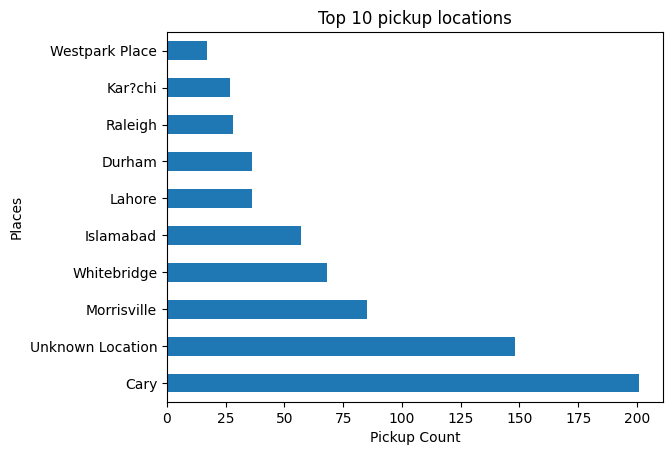

In [14]:
df['START*'].value_counts(ascending = False)[0:10].plot(kind = 'barh', ylabel = 'Places', xlabel = 'Pickup Count', title = 'Top 10 pickup locations')

This shows us that **'carey'** is the place where the user took called most of the rides from. It also tells us that we do not have data about pickup locations for a large number of rides.

Now, we will do same type of analysis for **'STOP'**

#### 3. STOP

In [15]:
len(df['STOP*'].unique())

188

<Axes: title={'center': 'Top 10 drop locations'}, xlabel='Drop Count', ylabel='Places'>

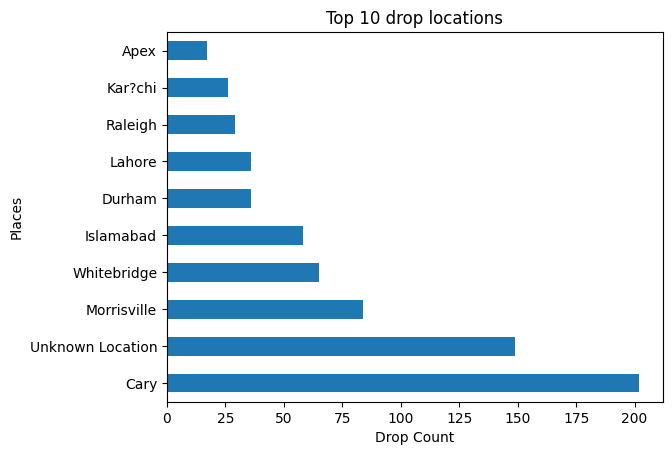

In [16]:
df['STOP*'].value_counts(ascending = False)[0:10].plot(kind = 'barh', ylabel = 'Places', xlabel = 'Drop Count', title = 'Top 10 drop locations')

From the above analysis we can see that most of the pickup as well as drops were done in **'Cary'**.

In [17]:
df[df['START*'] == 'Unknown Location']['START*'].value_counts()

START*
Unknown Location    148
Name: count, dtype: int64

In [18]:
df[df['STOP*'] == 'Unknown Location']['STOP*'].value_counts()

STOP*
Unknown Location    149
Name: count, dtype: int64

#### 4. Miles

<Axes: xlabel='MILES*', ylabel='Count'>

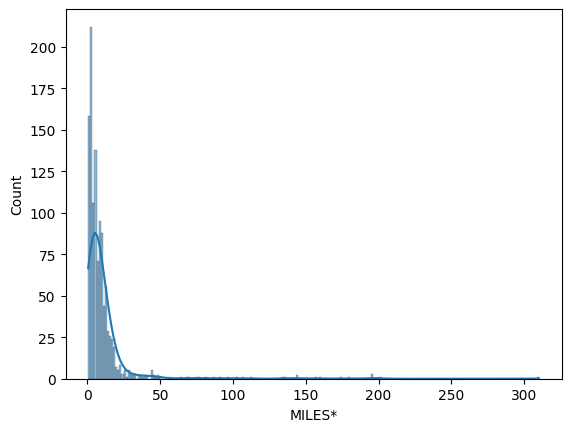

In [19]:
sns.histplot(df['MILES*'], kde = True)

In [20]:
df['MILES*'].describe()

count    1154.000000
mean       10.567418
std        21.588452
min         0.500000
25%         2.900000
50%         6.000000
75%        10.400000
max       310.300000
Name: MILES*, dtype: float64

<Axes: xlabel='MILES*', ylabel='Percent'>

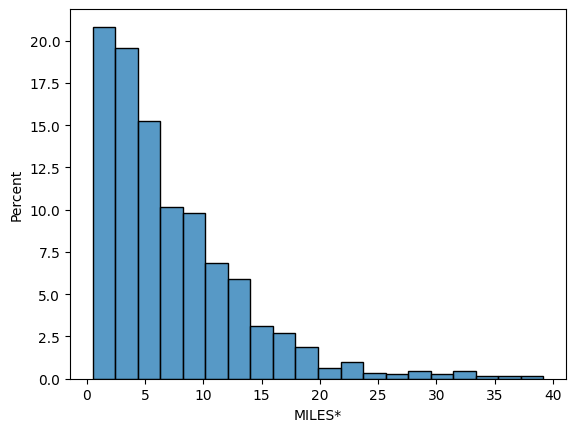

In [21]:
#limiting our analysis to rides where miles<40
sns.histplot(df[df['MILES*']<40]['MILES*'], stat = 'percent', bins = 20)


Insights from the above plots :

Most of the cabs booked for the distance of **0-6 miles**.

Majorly people chooses cabs for the distance of **0-20 miles**.

For distance more than **20 miles** cab counts is nearly negligible.

#### 5. PURPOSE

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Errand/Supplies'),
  Text(2, 0, 'Meeting'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Charity ($)'),
  Text(7, 0, 'Commute'),
  Text(8, 0, 'Moving'),
  Text(9, 0, 'Airport/Travel')])

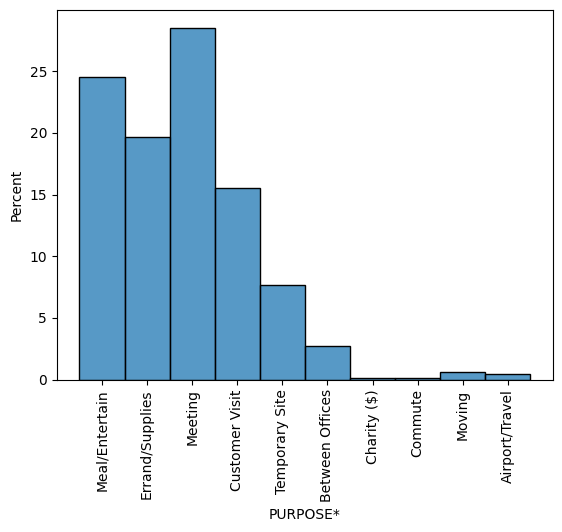

In [22]:
sns.histplot(df['PURPOSE*'], stat = 'percent')
plt.xticks(rotation = 90)

### Number of trips made based on day of week

<Axes: xlabel='day_of_week'>

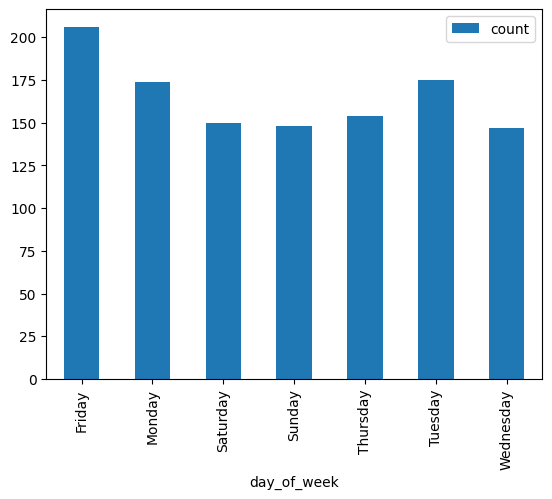

In [23]:
df['day_of_week'] = df['START_DATE*'].dt.day_name()
x1 = df.groupby('day_of_week')['day_of_week'].value_counts().reset_index()
x1.set_index('day_of_week', inplace = True)
x1.plot(kind = 'bar')

**Insights:**
There is no big difference in number of trips made based on day on which it was made. However, slightly larger amount of trips were made on Friday.


<Axes: xlabel='day_of_week', ylabel='count'>

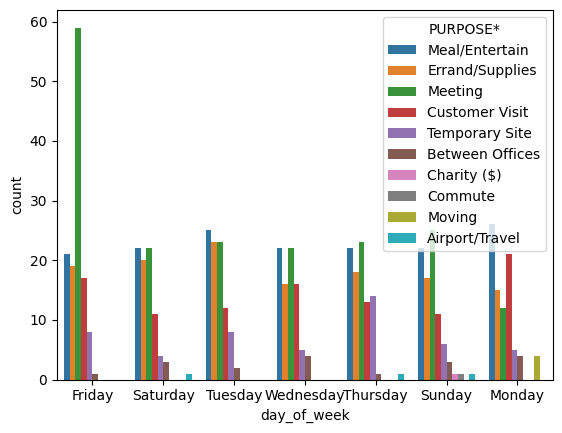

In [24]:
sns.countplot(data = df, x = df['day_of_week'], hue = df['PURPOSE*'])

**Insight:**
The reason for higher number of trips on Friday is due to **Meetings**


## EDA
**Multivariate**

In [25]:
df.groupby(['START*', 'STOP*'])['MILES*'].sum()

START*         STOP*             
Agnew          Agnew                   2.2
               Cory                    4.3
               Renaissance             4.6
Almond         Bryson City            15.2
Apex           Apex                    4.3
                                     ...  
Whitebridge    Wayne Ridge            31.9
               Westpark Place         31.4
               Whitebridge            14.1
               Williamsburg Manor      8.3
Winston Salem  Asheville             133.6
Name: MILES*, Length: 363, dtype: float64

In [26]:
df.groupby(['START*', 'STOP*'])['MILES*'].sum().sort_values(ascending = False)[1:11]

START*            STOP*           
Morrisville       Cary                395.7
Cary              Durham              390.0
                  Morrisville         380.0
Raleigh           Cary                365.7
Cary              Raleigh             336.5
Durham            Cary                324.5
Latta             Jacksonville        310.3
Islamabad         Unknown Location    267.0
Cary              Cary                255.9
Unknown Location  Islamabad           243.8
Name: MILES*, dtype: float64

Now we will check for number of round trips made.

<Axes: xlabel='ROUND_TRIP', ylabel='count'>

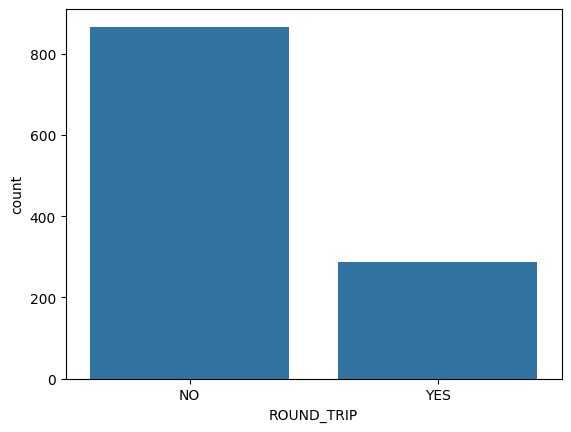

In [27]:
def is_roundtrip(df):
    if df['START*'] == df['STOP*']:
        return 'YES'
    else:
        return 'NO'

df['ROUND_TRIP'] = df.apply(is_roundtrip, axis = 1)

sns.countplot(x = 'ROUND_TRIP', data = df, order = df['ROUND_TRIP'].value_counts().index)

Most of the trips are single trips and not round trips.